# Самостоятельный проект.

1. [Цель исследования и исходные данные](#goal)
    * [1.1 Задание](#order)
    * [1.2 Описание данных](#def)
    * [1.3 Загрузка необходимых данных и библиотек](#load)
    * [1.4 Проверка исходных данных на пропуски дубликаты](#check)
    * [1.5 Заменим тип данных в столбце 'month_to_end_contract' на целочисленный](#chenge_type)
2. [Анализ данных](#analysis)
    * [2.1 Проведем исследовательский анализ данных (EDA)](#a_2_1)
    * [2.2 Проведем исследовательский анализ данных (EDA) для двух групп, тех кто ушел в отток и тех кто остался](#a_2_2)
    * [2.3 Построим гистонраммы с разделением по тем кто ушел в оттток и тех кто остался](#a_2_3)
    * [2.4 Построим матрицу корреляции](#a_2_4)
3. [Модель прогнозирования оттока клиентов](#churn)
    * [3.1 Построим модель бинарной классификации оттока клиентов методом логистической регрессии и случайного леса](#ML_3_1)
4. [Проведем класторизацию клиентов. ](#clustering)
    * [4.1 Стандартезируем данные](#cluster_4_1)
    * [4.2 Нарисуем матрицу  расстояний и построим дендрограмму](#cluster_4_2)
    * [4.3 Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. По заданию число кластеров принять n=5](#cluster_4_3)
    * [4.4 Построим распределения признаков для кластеров](#cluster_4_4)
    * [4.5 Для каждого полученного кластера посчитаем долю оттока.](#cluster_4_5)   
5. [Выводы](#summary)



<a id="goal"></a> 
# 1 Цель исследования и исходные данные
<a id="order"></a>
## 1.1 Задание
На примере посещаемости фитнес-зала проработать следующие момменты:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток.

Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1. выделить целевые группы клиентов;
2. предложить меры по снижению оттока;
3. определить другие особенности взаимодействия с клиентами.

<a id="def"></a>
## 1.2 Описание данных

Набор данных включает следующие поля:
Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.

<a id="load"></a>
## 1.3 Загрузка необходимых данных и библиотек

In [1]:
#Загрузим необходимые библиотеки.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

import itertools

from sklearn.cluster import KMeans
import seaborn as sns

import matplotlib.pyplot as plt
import os
from scipy import stats as st
import re
from datetime import datetime, timedelta
import datetime as dt
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objs as go

In [2]:
#Загружаем все данные по работе с проектом

try:
    data = pd.read_csv('gym_churn.csv') # Локальный путь
    
except:
    data = pd.read_csv('/datasets/gym_churn.csv') # Серверный путь

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<a id="check"></a>
## 1.4 Проверка исходных данных на пропуски дубликаты.

In [4]:
# Напишем функцию для изменения регистра названий столбцов на нижний и замены пробелов на прочерк

def columns_ok(data):
    columns = data.columns
    columns = [re.sub(r'([A-Z])', r' \1', x) for x in columns]
    columns = [re.sub(' ', '_', x.lower()) for x in columns]
    columns = [re.sub('^(_)', '', x.lower()) for x in columns]
    columns = [re.sub('__', '_', x.lower()) for x in columns]
    data.set_axis(columns, axis = 'columns', inplace=True)
    return data

In [5]:
# Заменим названия колонок на красивые

columns_ok(data).columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Названия колонок поменяны.

In [6]:
# Напишем функцию для проверки наличия дубликатов и пропусков

def check_dup_nan(dataframe):
    df = dataframe
    list_col = list(df.columns)
    print('Количество задублированных строк в дата сете:', df.duplicated().sum(), 'шт.')
    print('')
    summa = 0
    for col in list_col:
        print('Кол-во пропусков в столбеце:  ', col, '-', df[col].isna().sum(), 'шт.', 
             '  тип данных:', df[col].dtypes)
        summa += df[col].isna().sum()
    print('===================================================================')
    check_marker = df.duplicated().sum() + summa
    if check_marker == 0:
        print('Пропусков и дубликатов строк не обнаружено.')
    else:
        print('Ошибки в данных! Требуется обратить внимание.')

In [7]:
#Посмотрим сводную информацию о дата сете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [8]:
check_dup_nan(data)

Количество задублированных строк в дата сете: 0 шт.

Кол-во пропусков в столбеце:   gender - 0 шт.   тип данных: int64
Кол-во пропусков в столбеце:   near_location - 0 шт.   тип данных: int64
Кол-во пропусков в столбеце:   partner - 0 шт.   тип данных: int64
Кол-во пропусков в столбеце:   promo_friends - 0 шт.   тип данных: int64
Кол-во пропусков в столбеце:   phone - 0 шт.   тип данных: int64
Кол-во пропусков в столбеце:   contract_period - 0 шт.   тип данных: int64
Кол-во пропусков в столбеце:   group_visits - 0 шт.   тип данных: int64
Кол-во пропусков в столбеце:   age - 0 шт.   тип данных: int64
Кол-во пропусков в столбеце:   avg_additional_charges_total - 0 шт.   тип данных: float64
Кол-во пропусков в столбеце:   month_to_end_contract - 0 шт.   тип данных: float64
Кол-во пропусков в столбеце:   lifetime - 0 шт.   тип данных: int64
Кол-во пропусков в столбеце:   avg_class_frequency_total - 0 шт.   тип данных: float64
Кол-во пропусков в столбеце:   avg_class_frequency_current_month 

<a id="chenge_type"></a>
## 1.5 Заменим тип данных в столбце 'month_to_end_contract' на целочисленный.

In [9]:
data['month_to_end_contract'] = data['month_to_end_contract'].astype(int)

In [10]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


<a id="analysis"></a>
# 2 Анализ данных

<a id="a_2_1"></a>
# 2.1 Проведем исследовательский анализ данных (EDA).

In [11]:
# методом describe посмотрим на характеристики данных

data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Из полученной таблицы выше можно выделить следующие тезисы:
* в зал больше ходит мужчин, если брать за "1" - мужчина, а за "0" - женщина (в среднем так и бывает, что мужчин больше);
* для большинства пользователей зал находится рядом с работой или домом - 85%;
* меньше половины пользователей являются сотрудниками компании партнера фиитнес-клуба;
* менее трети пользователей пришли по промо-акции (вот тут наверное можно сделать замечание, что промо-акции не достаточно активны);
* 90% пользователей оставили свой контактный телефон;
* 4,6 месяца - средний период действия абонемента всех пользователей на данный момент;
* групповые занятия посещают 41% пользователей;
* средний возраст пользователя - 29 лет;
* суммарная выручка от других услуг фитнес-центра составляет 146 едениц;
* в среднем до завершения контракта 4,3 месяца;
* средний лайфтайм пользователя составляет - 3,7 месяца
* средняя частота посещений в неделю за все время с начала действия абонемента - 1,88;
* средняя частота посещений в неделю за предыдущий месяц - 1,77;
* отток за рассматриваемый период составил - 26,5%.

Стандартное отклонение по суммарной выручке от других услуг фитнес-центра составляет 2/3 от среднего. Это говорит о том, что часть пользователей не тратят дополнительныйх денег в клубе, а другая часть тратит довольно много.

<a id="a_2_2"></a>
## 2.2 Проведем исследовательский анализ данных (EDA) для двух групп, тех кто ушел в отток и тех кто остался.

In [13]:
# методом describe посмотрим на характеристики данных
pd.set_option('display.max_columns', None) #нашел настройку для отображения всех столбцов
churn_data = data.groupby('churn').describe()
churn_data

gender                                              near_location  \
        count      mean       std  min  25%  50%  75%  max         count   
churn                                                                      
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0        2939.0   
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0        1061.0   

                                                   partner            \
           mean       std  min  25%  50%  75%  max   count      mean   
churn                                                                  
0      0.873086  0.332933  0.0  1.0  1.0  1.0  1.0  2939.0  0.534195   
1      0.768143  0.422217  0.0  1.0  1.0  1.0  1.0  1061.0  0.355325   

                                         promo_friends                      \
            std  min  25%  50%  75%  max         count      mean       std   
churn                                                                        
0      0.498914  0.0  0.0  1.0  1.0  1.0        2939.0  0.353522  0.478144   
1      0.478837  0.0  0.0  0.0  1.0  1.0        1061.0  0.183789  0.387495   

                                 phone                                     \
       min  25%  50%  75%  max   count      mean       std  min  25%  50%   
churn                                                                       
0      0.0  0.0  0.0  1.0  1.0  2939.0  0.903709  0.295040  0.0  1.0  1.0   
1      0.0  0.0  0.0  0.0  1.0  1061.0  0.902922  0.296204  0.0  1.0  1.0   

                contract_period                                           \
       75%  max           count      mean       std  min  25%  50%   75%   
churn                                                                      
0      1.0  1.0          2939.0  5.747193  4.716942  1.0  1.0  6.0  12.0   
1      1.0  1.0          1061.0  1.728558  2.132371  1.0  1.0  1.0   1.0   

            group_visits                                                  age  \
        max        count      mean       std  min  25%  50%  75%  max   count   
churn                                                                           
0      12.0       2939.0  0.464103  0.498795  0.0  0.0  0.0  1.0  1.0  2939.0   
1      12.0       1061.0  0.268615  0.443448  0.0  0.0  0.0  1.0  1.0  1061.0   

                                                          \
            mean       std   min   25%   50%   75%   max   
churn                                                      
0      29.976523  3.009933  19.0  28.0  30.0  32.0  41.0   
1      26.989632  2.895163  18.0  25.0  27.0  29.0  38.0   

      avg_additional_charges_total                                   \
                             count        mean        std       min   
churn                                                                 
0                           2939.0  158.445715  99.801599  0.171862   
1                           1061.0  115.082899  77.696419  0.148205   

                                                    month_to_end_contract  \
             25%         50%         75%        max                 count   
churn                                                                       
0      76.920993  149.881171  224.448274  552.59074                2939.0   
1      50.629127  103.814686  165.616858  425.53522                1061.0   

                                                     lifetime            \
           mean       std  min  25%  50%   75%   max    count      mean   
churn                                                                     
0      5.283089  4.363522  1.0  1.0  6.0  10.0  12.0   2939.0  4.711807   
1      1.662582  1.964593  1.0  1.0  1.0   1.0  12.0   1061.0  0.990575   

                                          avg_class_frequency_total            \
            std  min  25%  50%  75%   max                     count      mean   
churn                                                                           
0      3.874780  0.0  2.0  4.0  6.0  31

In [14]:
# Т.к. в предыдущей ячейке таблица схлопнулась, получу те же данные но другим способом для визуального анализа.
# группа тех кто не ушел в отток.

data.query('churn == 0').describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


После разделения на группы имеем следующие характеристики пользователей тех кто остался:
* в зал по прежнему больше ходит мужчин;
* для большинства пользователей зал находится рядом с работой или домом - 87%;
* более половины пользователей -53,4% являются сотрудниками компании партнера фиитнес-клуба;
* более трети - 35% пользователей пришли по промо-акции;
* 90% пользователей оставили свой контактный телефон;
* 5,8 месяца - средний период действия абонемента всех пользователей на данный момент;
* групповые занятия посещают 46% пользователей;
* средний возраст пользователя - 29 лет;
* суммарная выручка от других услуг фитнес-центра составляет 158 едениц;
* в среднем до завершения контракта 5,3 месяца;
* средний лайфтайм пользователя составляет - 4,7 месяца
* средняя частота посещений в неделю за все время с начала действия абонемента - 2;
* средняя частота посещений в неделю за предыдущий месяц - 2;

In [15]:
# группа тех кто не ушел в отток.

data.query('churn == 1').describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


После разделения на группы имеем следующие характеристики пользователей тех кто ушел в отток:
* из тех кто ушел больше мужчин;
* для большинства пользователей зал находится рядом с работой или домом - 77%;
* чуть больше трети пользователей являются сотрудниками компании партнера фиитнес-клуба;
* менее 19% пользователей пришли по промо-акции;
* 90% пользователей оставили свой контактный телефон;
* 1,7 месяца - средний период действия абонемента всех пользователей на данный момент;
* групповые занятия посещают 27% пользователей;
* средний возраст пользователя - 27 лет;
* суммарная выручка от других услуг фитнес-центра составляет 115 едениц;
* в среднем до завершения контракта 1,7 месяца;
* средний лайфтайм пользователя составляет - 0,99 месяца
* средняя частота посещений в неделю за все время с начала действия абонемента - 1,47;
* средняя частота посещений в неделю за предыдущий месяц - 1,05;

<a id="a_2_3"></a>
## 2.3 Построим гистонраммы с разделением по тем кто ушел в оттток и тех кто остался.

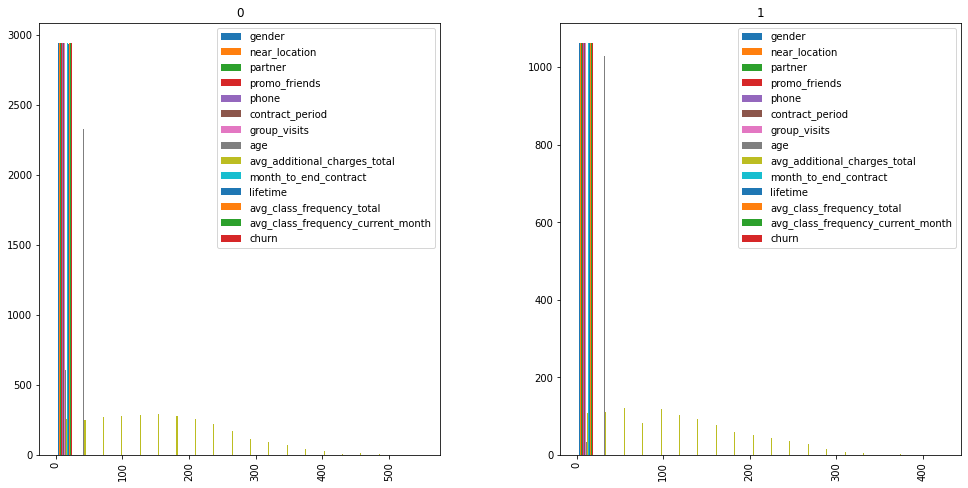

In [16]:
# Построим гистонраммы с разделением по тем кто ушел в оттток и тех кто остался.

data.hist(figsize=(16, 8), bins=20, by='churn', legend=True);# замечание принято

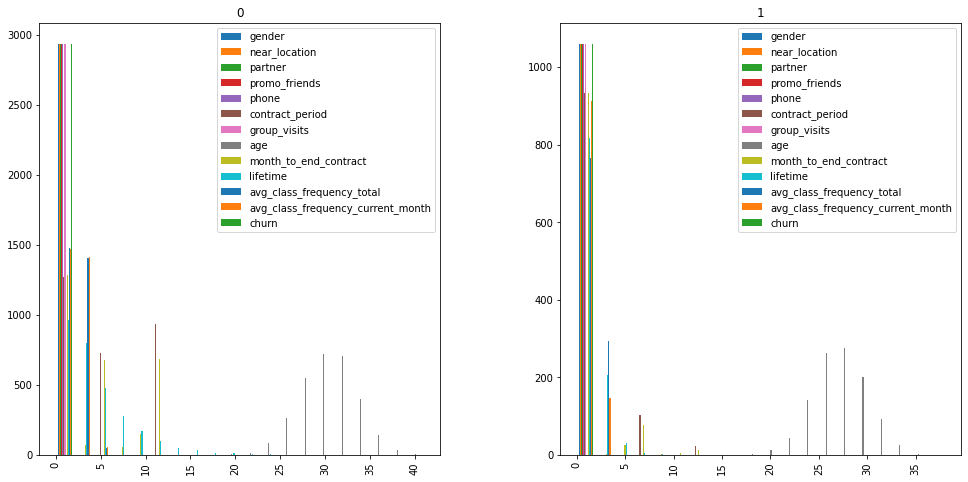

In [17]:
# Исключим колонку "avg_additional_charges_total" что бы получить более наглядные графики

data.drop('avg_additional_charges_total', axis=1).hist(figsize=(16, 8), bins=20, by='churn', legend=True);

Читаемость данных все равно на низком уровне. Построим графики отдельно по группам.

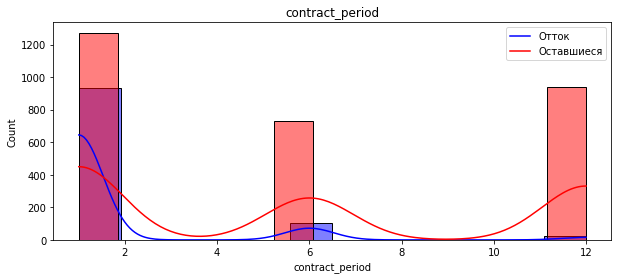

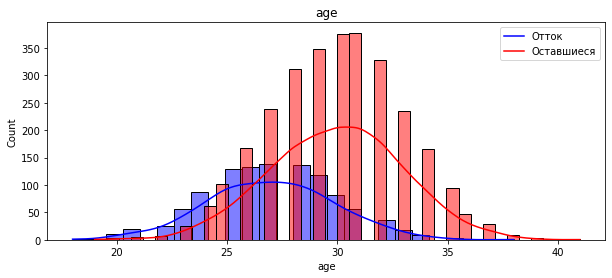

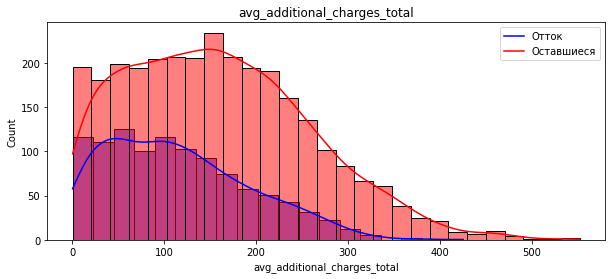

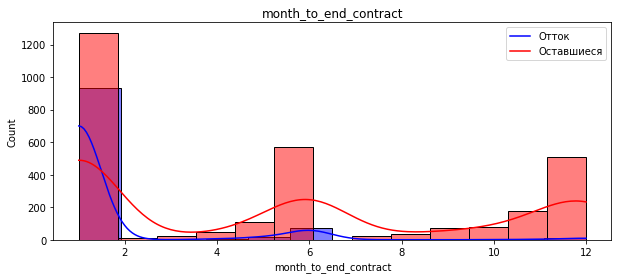

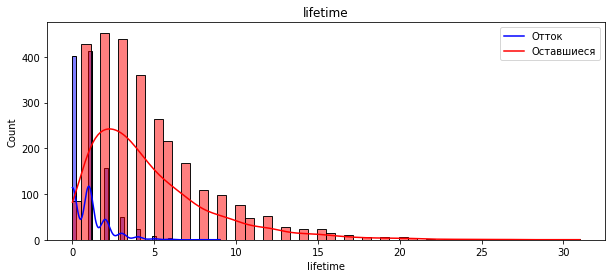

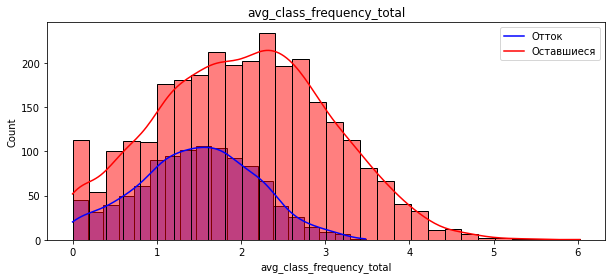

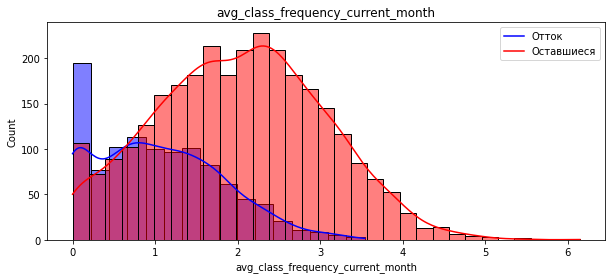

In [18]:
left = data[data['churn']==1]
stayed = data[data['churn']==0]
list_columns = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
#'gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn'
for column in list_columns:
    plt.figure(figsize=(10,4)) 
    plt.title(column)
    sns.histplot(left[column], color='blue',kde=True)
    sns.histplot(stayed[column], color='red',kde=True)
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

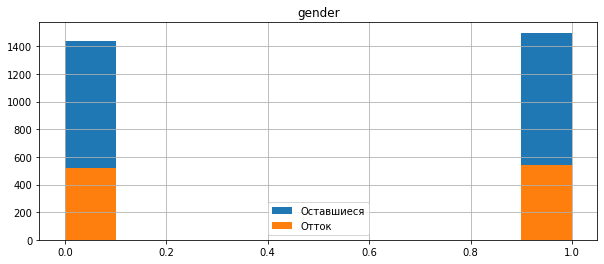

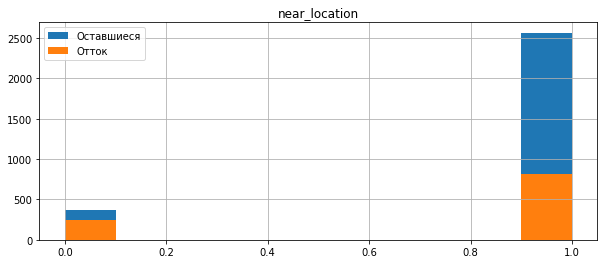

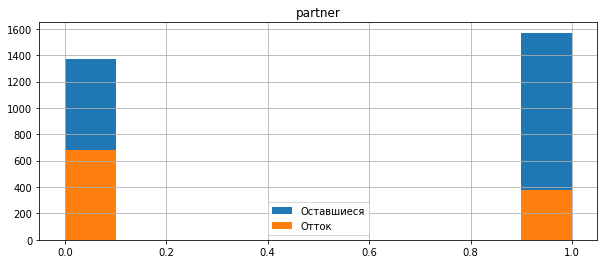

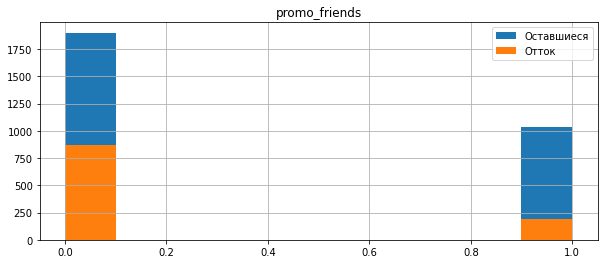

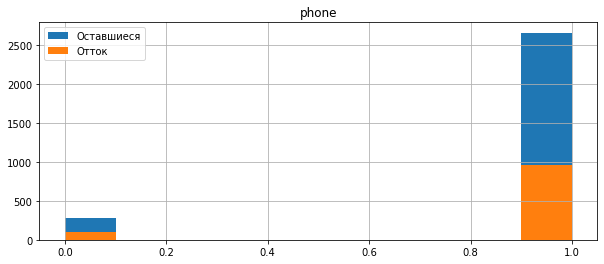

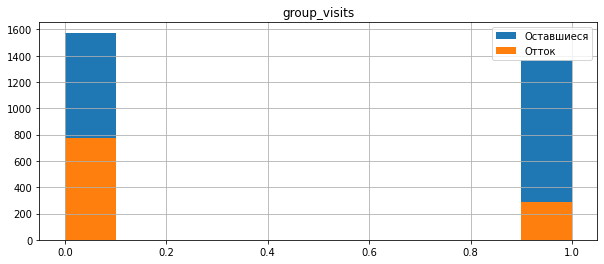

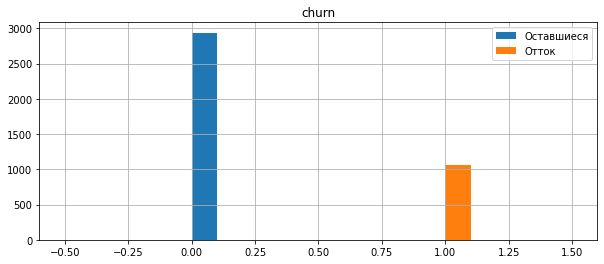

In [19]:
for column in data.columns:
    if column not in list_columns:
        plt.figure(figsize=(10,4))
        data.groupby('churn')[column].hist()
        plt.title(column)
        plt.legend(['Оставшиеся', 'Отток'])
        plt.show()

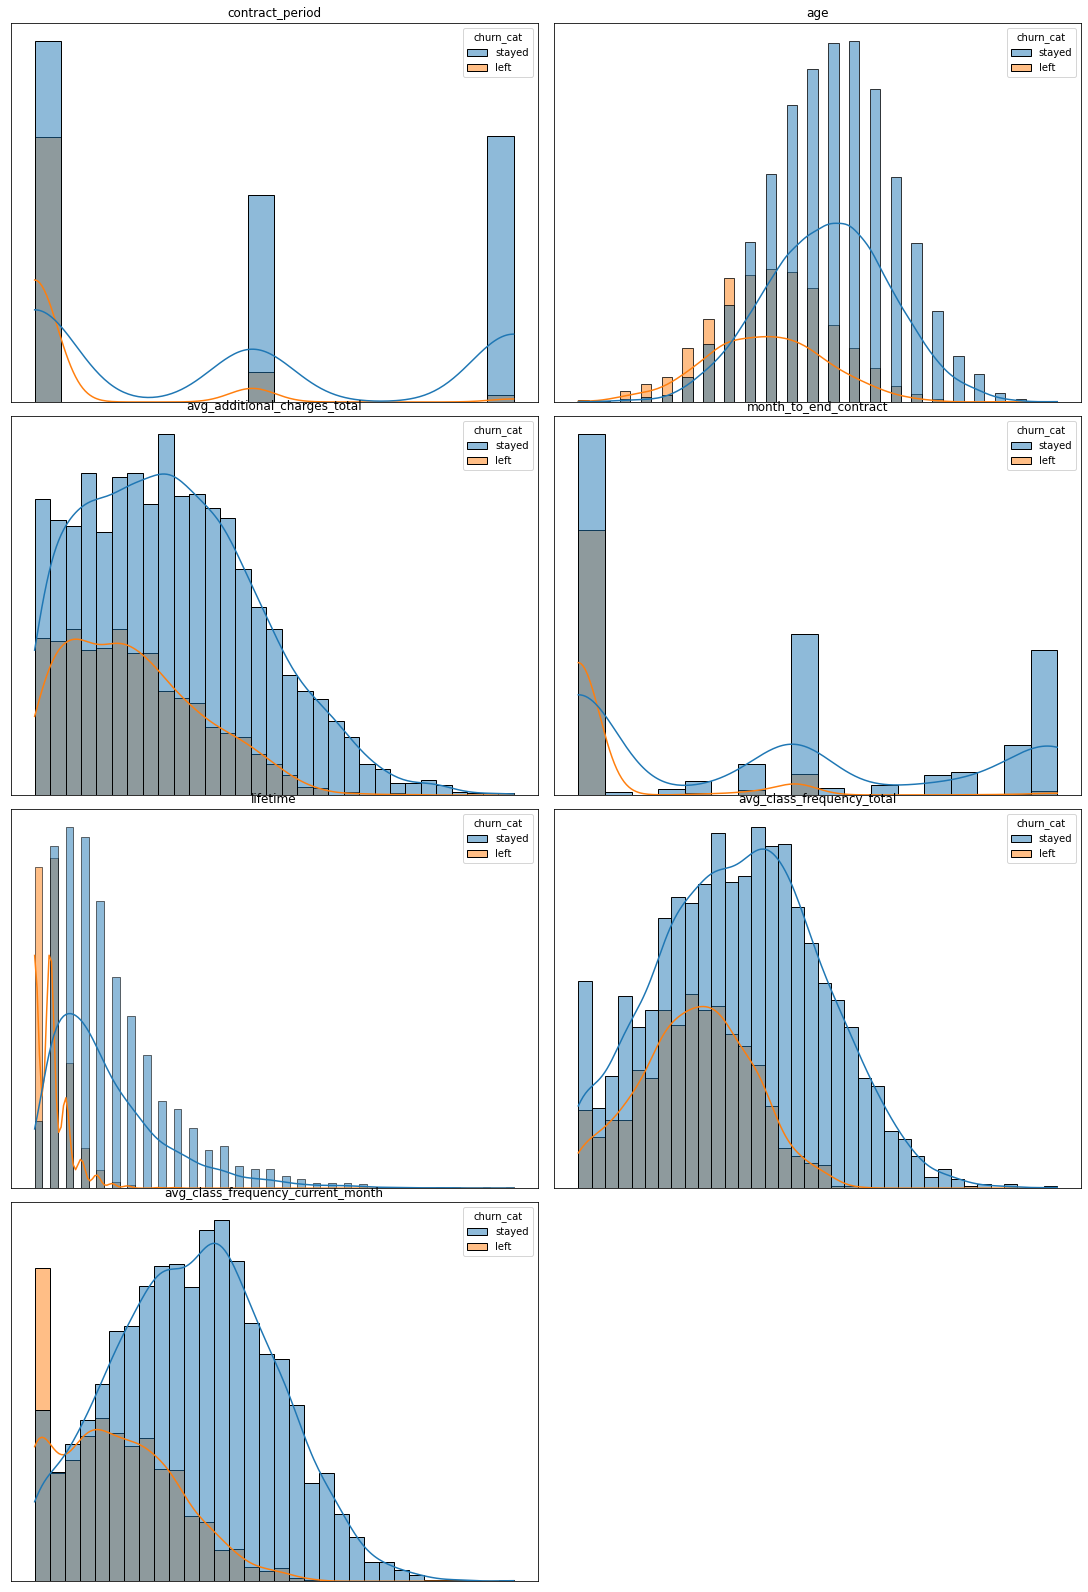

In [20]:
# создадим временный датасет и добавим в него категориальный столбец, на одном из форумов нашел что 
# hue работает с категориальными данными

df_h = data
df_h['churn_cat'] = data['churn'].apply(lambda x: 'left' if x == 1 else 'stayed')

list_columns = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract',
                'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
fig = plt.figure(constrained_layout=True)
plt.gcf().set_size_inches(15, 22)
j = 0

for column in list_columns:
    j = j + 1
    ax_j = fig.add_subplot(4, 2, j)
    ax_j.set(title = column, xticks=[], yticks=[])
    ax_j = sns.histplot(df_h, x=column, hue='churn_cat',kde=True)

plt.show()

In [21]:
data = data.drop('churn_cat', axis=1)# вот тут иногда приходится включать удаление столбца, а иногда оно не нужно
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

<a id="a_2_4"></a>
## 2.4 Построим матрицу корреляции.

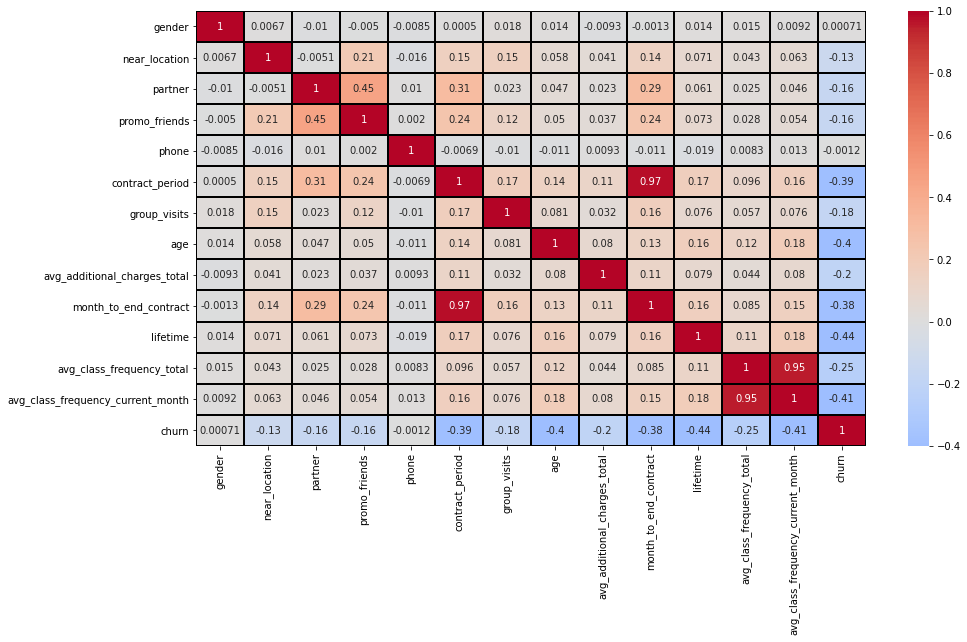

In [22]:
plt.figure(figsize=(15,8))

ax = sns.heatmap(data.corr(), annot = True, fmt='.2g', vmin=-0.4, vmax=1, center= 0, 
                 cmap= 'coolwarm', linewidths=1, linecolor='black')

По матрице корреляции можно отметить следующие моменты:
* "contract_period" коррелирует с "month_to_end_contract", но это вполне логично;
* "avg_class_frequency_total" коррелирует с "avg_class_frequency_current_month", и здесь вполне без сюрпризов;
* так же есть умеренная корреляция "partner" и "promo_friends". Здесь можно предположить, что работников компаний заманивали промо-акциями;
* наблюдается умеренная корреляция меежду "partner" и "contract_period". Это может говорить о том,что пользователи которые пришли от компании партнера предпочитают брать абонимент на больший срок;
* наблюдается умеренная корреляция меежду "partner" и "month_to_end_contract". Это может говорить о том,что пользователи которые пришли от компании партнера предпочитают брать абонимент на больший срок;
* наблюдается слабая корреляция меежду "promo_friends" и "contract_period". Это может говорить о том,что пользователи которые пришли по промо-акции предпочитают брать абонимент на больший срок;
* наблюдается слабая корреляция меежду "promo_friends" и "month_to_end_contract". Это может говорить о том,что пользователи которые пришли по промо-акции предпочитают брать абонимент на больший срок;
* наблюдается умеренная обратная корреляция меежду "contract_period" и "churn". Это может говорить о том,что чем меньше период контракта, тем больше вероятность оттока данного пользователя. Т.е. люди не имеют большой мотивации продлевать конракт, это заставляет задуматься о качестве сервиса;
* наблюдается умеренная обратная корреляция меежду "age" и "churn". Т.е. чем меньше пользователь тем больше вероятность оттока;
* наблюдается умеренная обратная корреляция меежду "month_to_end_contract" и "churn". Это подтверждает выдвинутое ранее предположение о том, что польщователи не продлевают свой абонимент;
* наблюдается умеренная обратная корреляция меежду "lifetime" и "churn". Чем меньше время с момента первого обращения в фитнес центр тем больше вероятность оттока, т.е. короткие контракты более вероятнее не будут продлины;
* наблюдается умеренная обратная корреляция меежду "avg_class_frequency_total" и "churn". Т.е. чем меньше человек посещяет, тем больше веротность его оттока. Другими словами, чем меньше заинтересованность, тем более вероятнее клиент уйдет.

Имеем две пары сильно коррелирующих признаков: "contract_period" - "month_to_end_contract" и "avg_class_frequency_total" - "avg_class_frequency_current_month". Для линейных алгоритмов это станет проблемой при обучении модели. Удалим из каждой пары по одному признаку. Это будет - "month_to_end_contract" и "avg_class_frequency_current_month".

In [23]:
data_clear = data.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis=1)
data_clear.shape

(4000, 12)

<a id="churn"></a>
## 3 Модель прогнозирования оттока клиентов.

<a id="ML_3_1"></a>
## 3.1 Построим модель бинарной классификации оттока клиентов методом логистической регрессии и случайного леса.

Построим модели бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.
Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом.
Определим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Проведем сравнение по ним модели. Определим какая модель показала себя лучше на основании метрик.

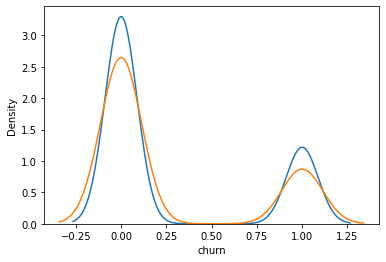

In [24]:
# Сравним распределения после деления выборок "y_train" и "y_test"
fb = data_clear

# разделим данные на признаки (матрица X) и целевую переменную (y)
X = fb.drop('churn', axis = 1)
y = fb['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# гистограмма целевой переменной на train
sns.kdeplot(y_train)

# гистограмма целевой переменной на test
sns.kdeplot(y_test);

По полученным графикам можно констатировать, что распределения выборок "y_train" и "y_test" похожи.

Принцип определения достаточности объема выборки гласит, что минимально необходимое количество наблюдений в выборке линейно связано с числом признаков. То есть минимальная выборка может быть рассчитана по формуле:

s = k * n, 

где n — число признаков для каждого наблюдения, а k — коэффициент, который из опыта часто считают равным 10.

In [25]:
data_clear.shape

(4000, 12)

И так, имеем 11 признаков и 4000 наблюдений. Применяя выше озвученную формулу, можем заключить, что объем выборки достаточен для анализа.

In [26]:
print('Размер датасета:', data_clear.shape)
data_clear.head()

# посмотрим, как соотносятся классы набора данных
print('Соотношение классов:\n', data_clear['churn'].value_counts())

Размер датасета: (4000, 12)
Соотношение классов:
 0    2939
1    1061
Name: churn, dtype: int64


В виду то, что соотношение групп равно 1 к 3, можно сделать вывод что при подсчете метрик полученных прогнозов, значение "accuracy" будет не совсем корректно.

In [27]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [28]:
print('Размер датасета:', data_clear.shape)
data_clear.head()

# посмотрим, как соотносятся классы для нашего набора данных
data_clear['churn'].value_counts()

# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data_clear.drop('churn', axis=1)
y = data_clear['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

Размер датасета: (4000, 12)


In [29]:
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)


# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
# обучим модель случайного леса
#rf_model.fit(X_train_st, y_train)
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.81
	F1: 0.80
	ROC_AUC: 0.95
Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.78
	Recall: 0.77
	F1: 0.78
	ROC_AUC: 0.94


Все полученные коэффичиенты надо рассматривать в интервале от 0 до 1, где 1 значит великолепно работающую модель. Исходя из этого можно сделать вывод что метод логической регресси дает лучшие результаты.

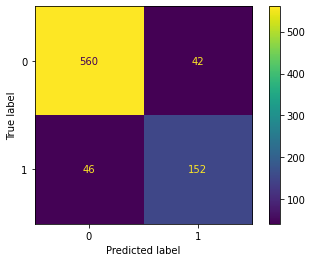

Оценим перекос модели - ответ представлен в виде:
 [TN, FP,
 FN, TP]

 [[560  42]
 [ 46 152]]


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)

cm = confusion_matrix(y_test, rf_predictions)
tn, fp, fn, tp = cm.ravel() # "выпрямляем" матрицу, чтобы вытащить нужные значения

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()
print('Оценим перекос модели - ответ представлен в виде:\n [TN, FP,\n FN, TP]\n\n', cm)# для сравнения корректности

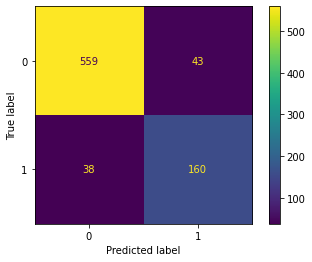

Оценим перекос модели - ответ представлен в виде:
 [TN, FP,
 FN, TP]

 [[559  43]
 [ 38 160]]


In [31]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)

cm = confusion_matrix(y_test, lr_predictions)
tn, fp, fn, tp = cm.ravel() # "выпрямляем" матрицу, чтобы вытащить нужные значения

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()
print('Оценим перекос модели - ответ представлен в виде:\n [TN, FP,\n FN, TP]\n\n', cm)# для сравнения корректности

Можно сказать, что модель делит примерно пополам неверные ответы между позитив и негатив.

<a id="clustering"></a>
## 4 Проведем класторизацию клиентов.

In [32]:
data_clear_no_churn = data_clear.drop('churn', axis=1)

<a id="cluster_4_1"></a>
## 4.1 Стандартезируем данные.

In [33]:
#from sklearn.preprocessing import StandardScaler()

scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
X_sc = scaler.fit_transform(data_clear_no_churn) # обучаем нормализатор и преобразуем набор данных
print(X_sc)

[[ 0.97970588  0.42788074  1.02686062 ... -1.37753121 -0.19332863
  -1.91191971]
 [-1.0207145   0.42788074 -0.973842   ... -0.35021325  0.87368001
   0.04517569]
 [-1.0207145   0.42788074  1.02686062 ... -0.1815923  -0.46008079
  -0.02049263]
 ...
 [ 0.97970588  0.42788074  1.02686062 ... -0.71300239 -0.46008079
   0.93313947]
 [-1.0207145   0.42788074  1.02686062 ... -0.88258181 -0.19332863
  -0.25604937]
 [ 0.97970588 -2.33709981  1.02686062 ...  0.33129445 -0.72683295
  -0.79947418]]


<a id="cluster_4_2"></a>
## 4.2 Нарисуем матрицу  расстояний и построим дендрограмму.

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

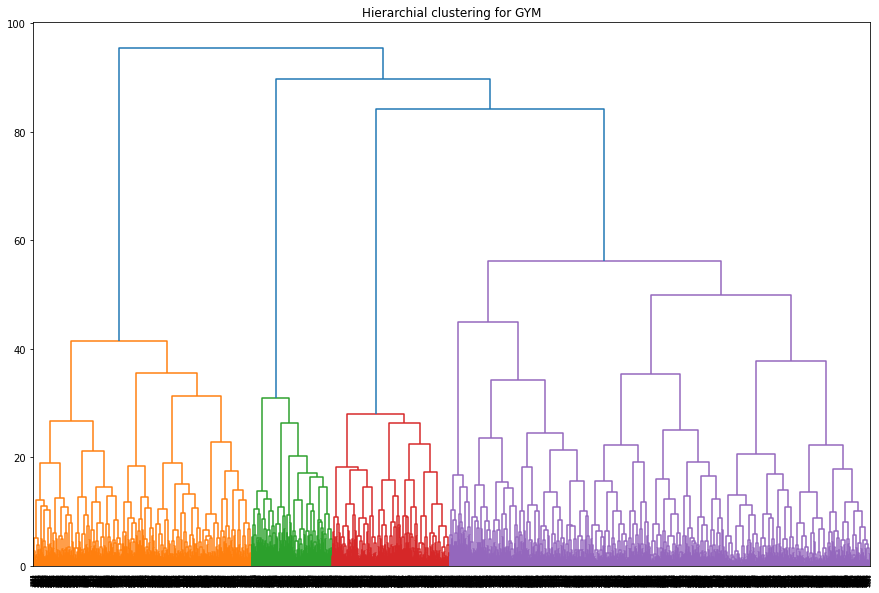

In [35]:
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

Программа определила 4 типа клиентов. Но по заданию будем в дальнейшем работать с 5 группамию.

<a id="cluster_4_3"></a>
## 4.3 Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. По заданию число кластеров принять n=5.

In [36]:
data_clear_no_churn.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'lifetime',
       'avg_class_frequency_total'],
      dtype='object')

(4000, 11)
              gender  near_location   partner  promo_friends  phone  \
cluster_km                                                            
0           0.499109       0.000000  0.488414       0.076649    1.0   
1           0.488571       0.995238  0.955238       0.892381    1.0   
2           0.505300       1.000000  0.238516       0.059187    1.0   
3           0.544202       1.000000  0.250287       0.079219    1.0   
4           0.523316       0.862694  0.471503       0.305699    0.0   

            contract_period  group_visits        age  \
cluster_km                                             
0                  3.032086      0.235294  28.721925   
1                  7.660952      0.458095  29.543810   
2                  2.819788      0.000000  28.770318   
3                  4.528129      1.000000  29.536165   
4                  4.777202      0.427461  29.297927   

            avg_additional_charges_total  lifetime  avg_class_frequency_total  
cluster_km        

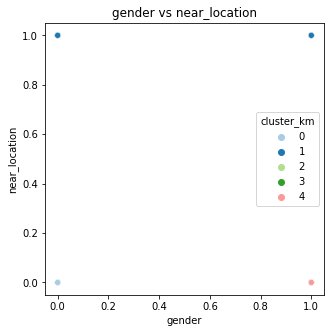

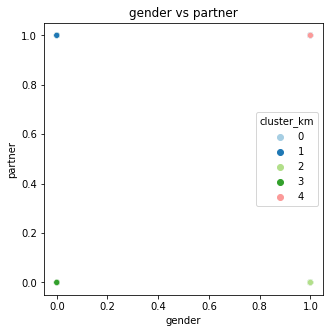

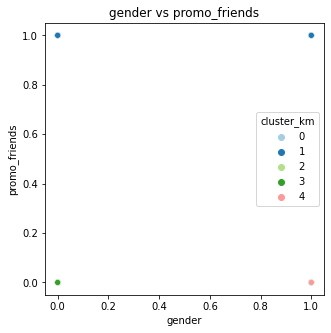

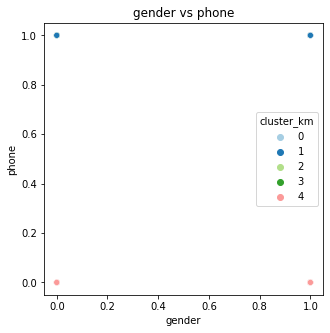

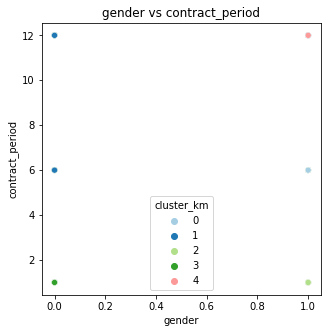

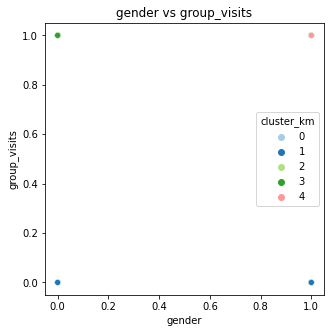

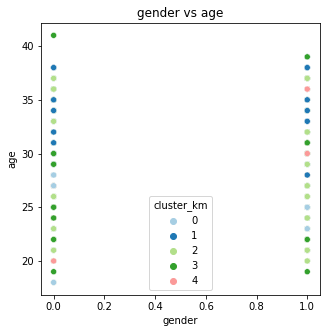

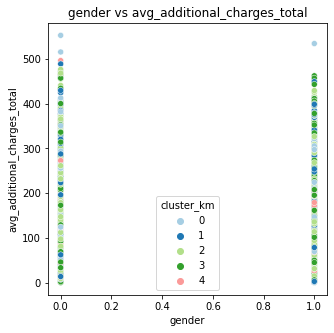

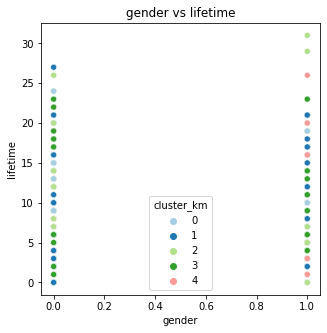

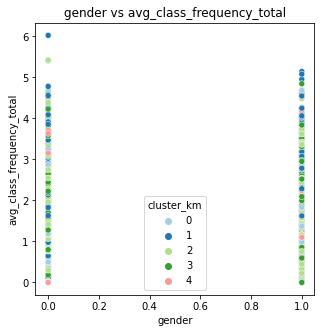

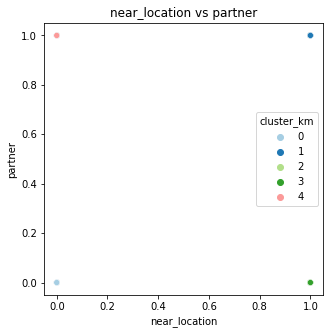

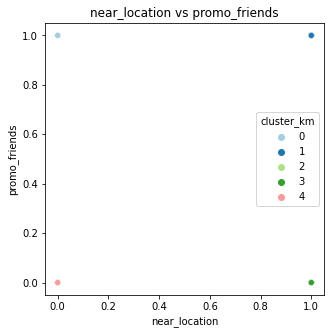

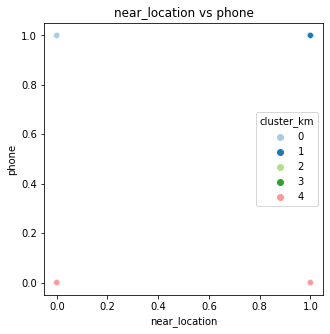

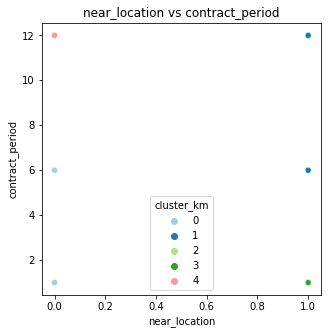

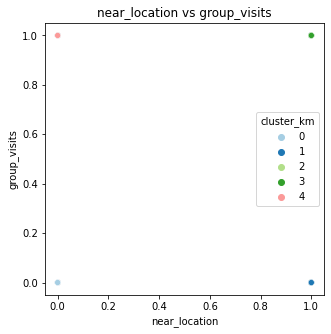

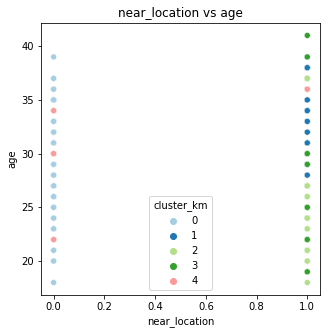

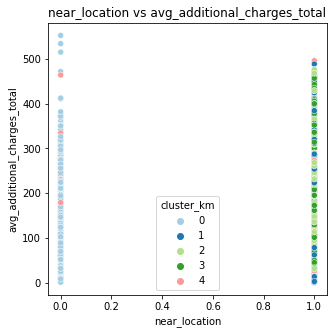

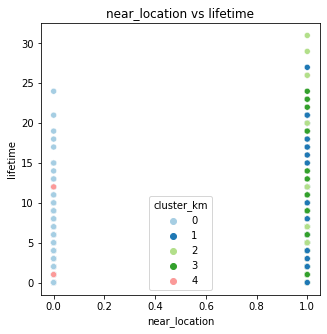

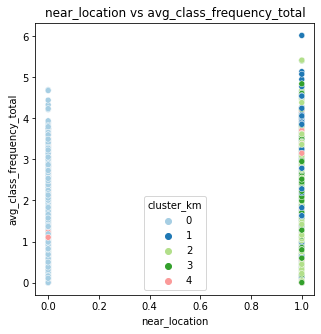

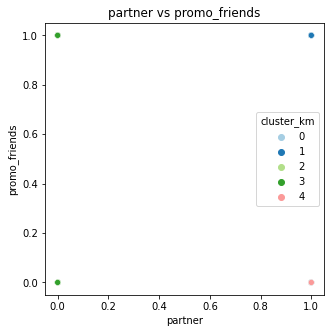

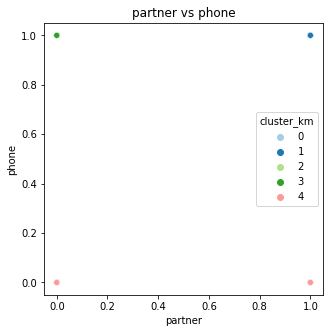

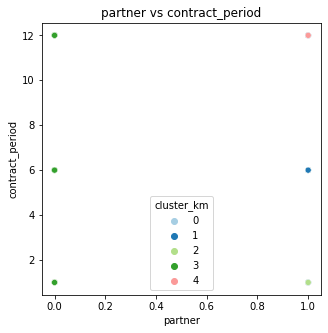

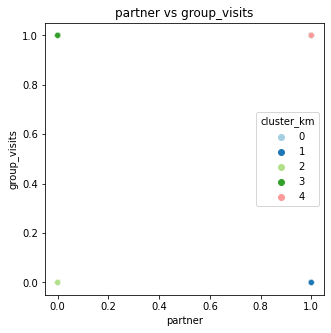

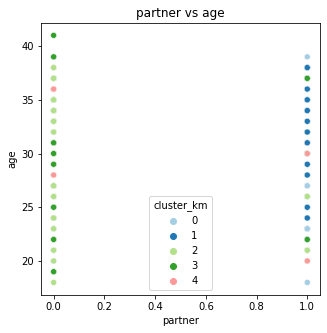

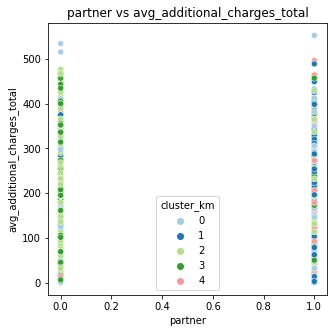

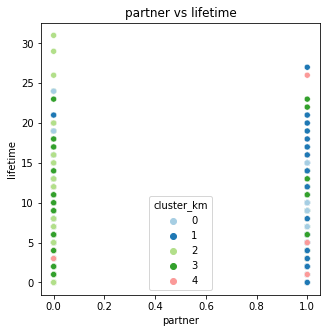

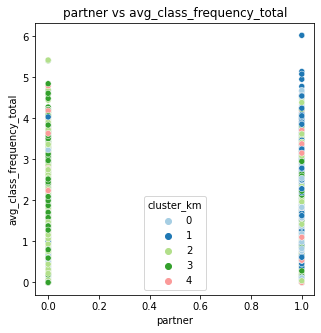

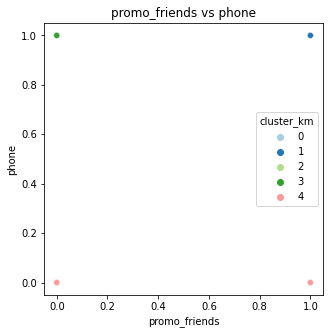

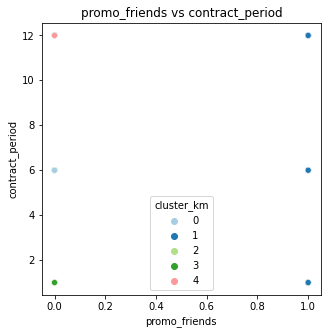

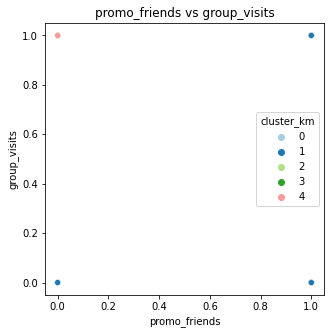

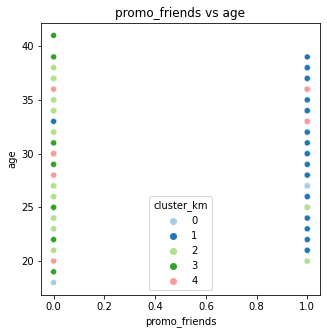

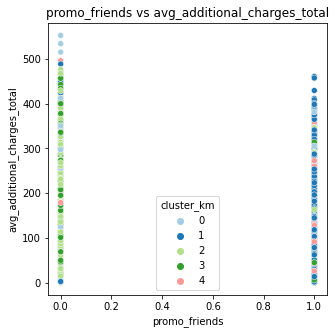

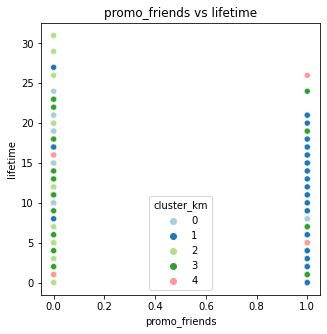

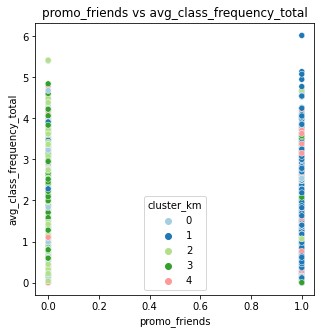

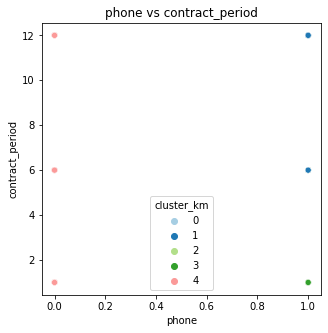

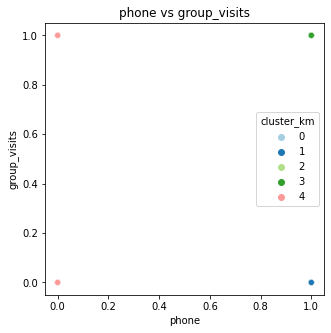

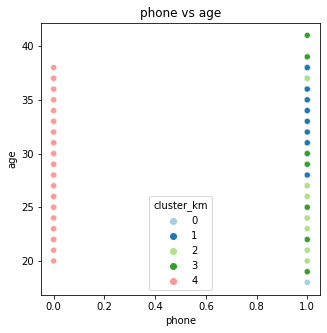

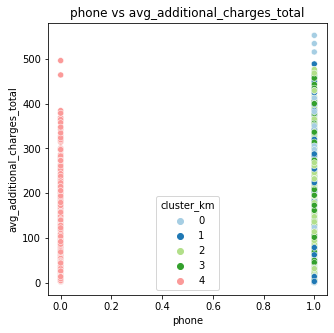

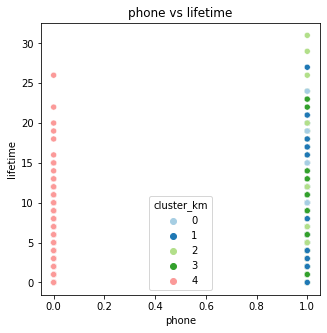

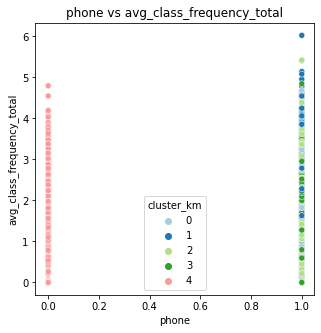

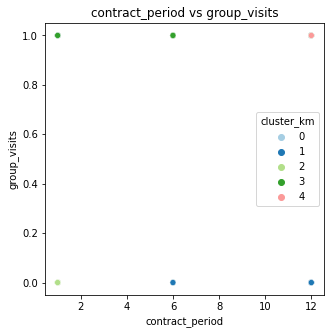

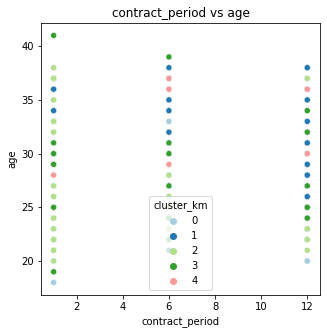

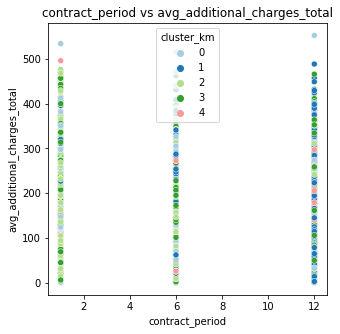

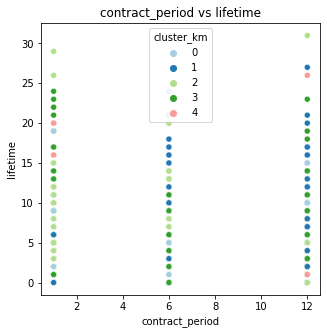

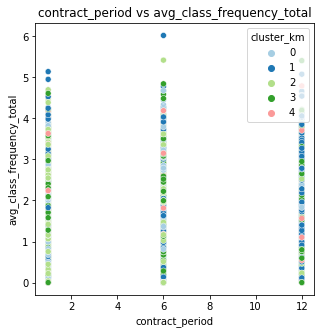

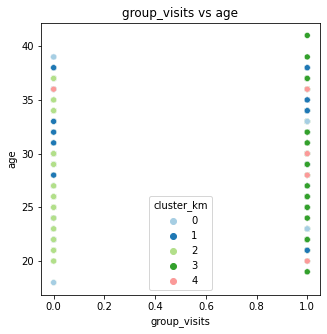

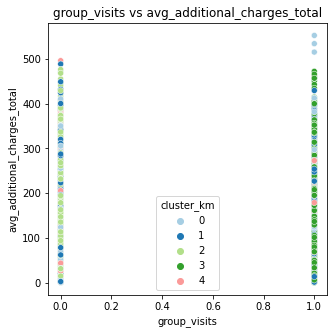

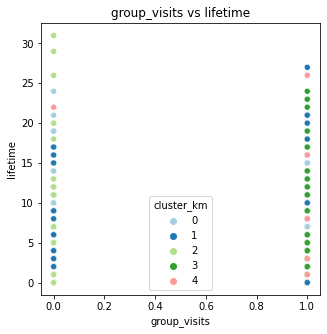

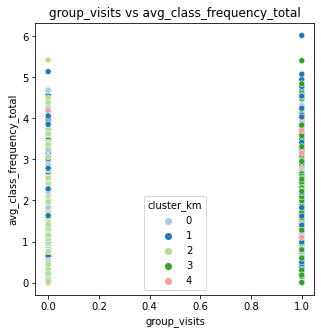

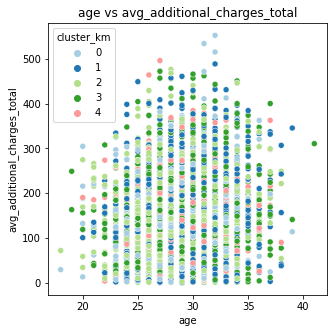

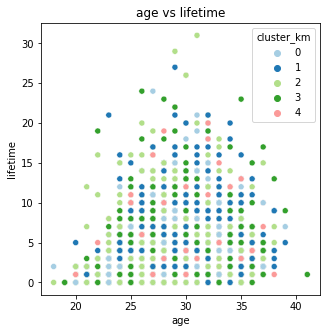

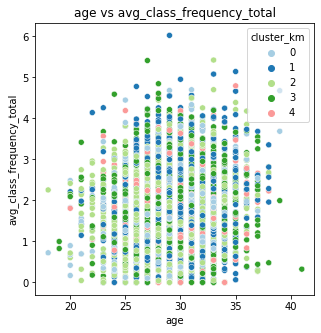

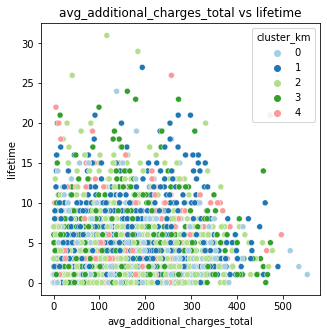

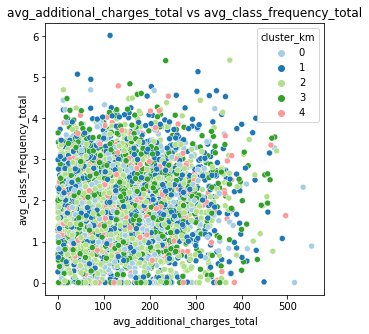

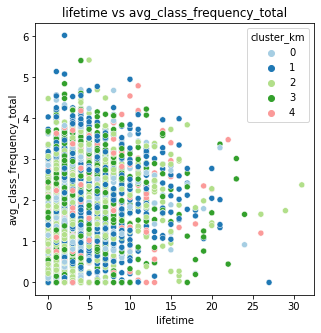

In [37]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        x=df[x_name], y=df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


# читаем данные
#travel = pd.read_csv('/datasets/tripadvisor_review_case.csv')
print(data_clear_no_churn.shape)

# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(data_clear_no_churn)

# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
data_clear_no_churn['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters = data_clear_no_churn.groupby(['cluster_km']).mean()
print(clusters)
# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(data_clear_no_churn.drop('cluster_km', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(data_clear_no_churn, pair[0], pair[1], 'cluster_km')

Сложно коментировать "голые" цифры, постороим выводы на графиках полученных с следующем шаге.

<a id="cluster_4_4"></a>
## 4.4 Построим распределения признаков для кластеров.

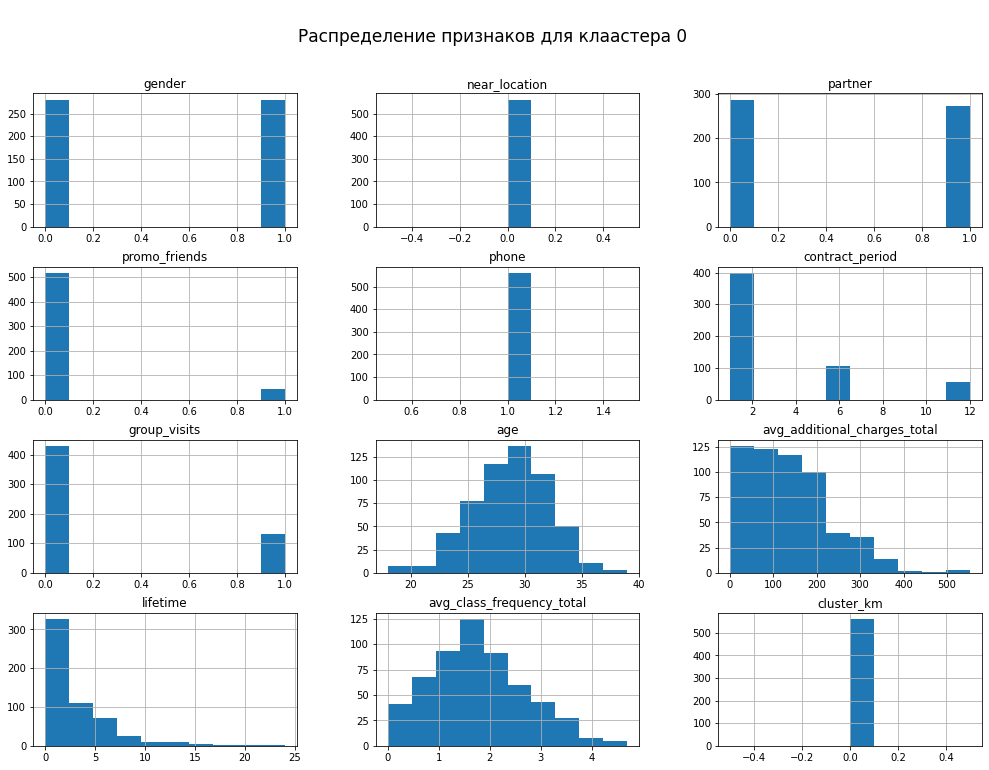

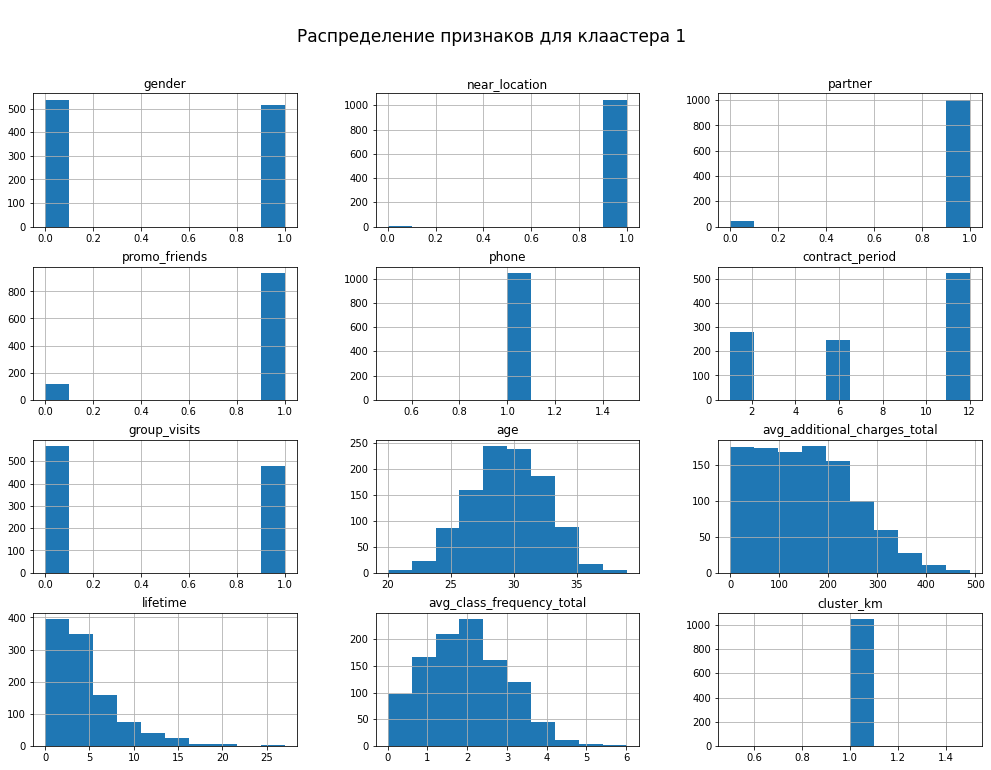

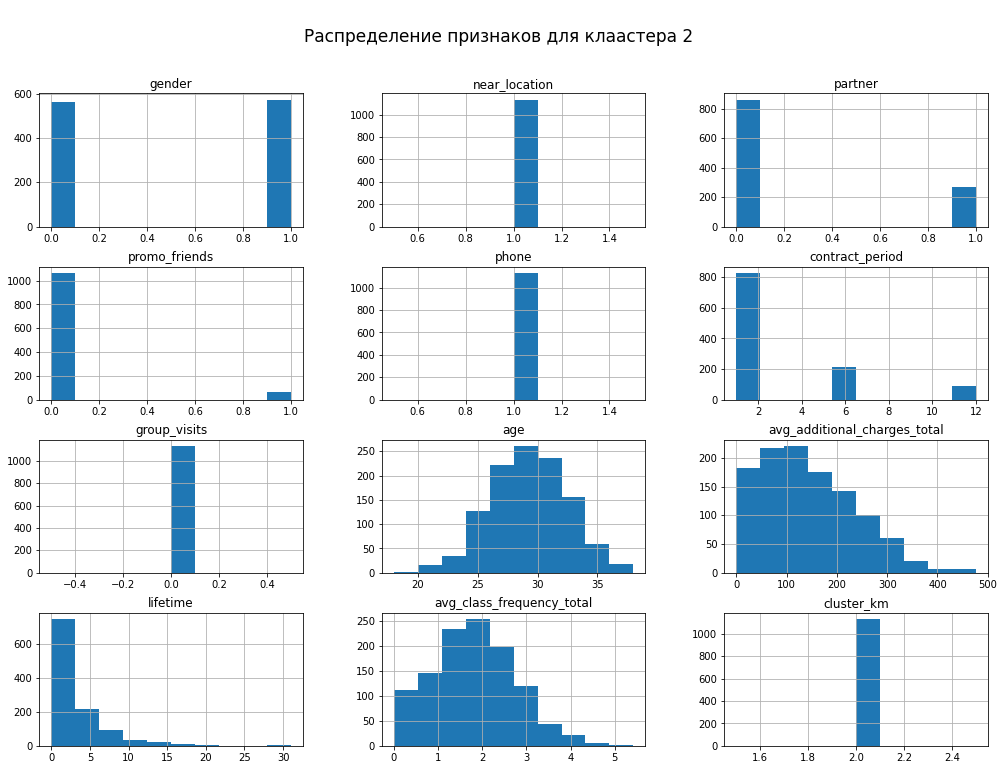

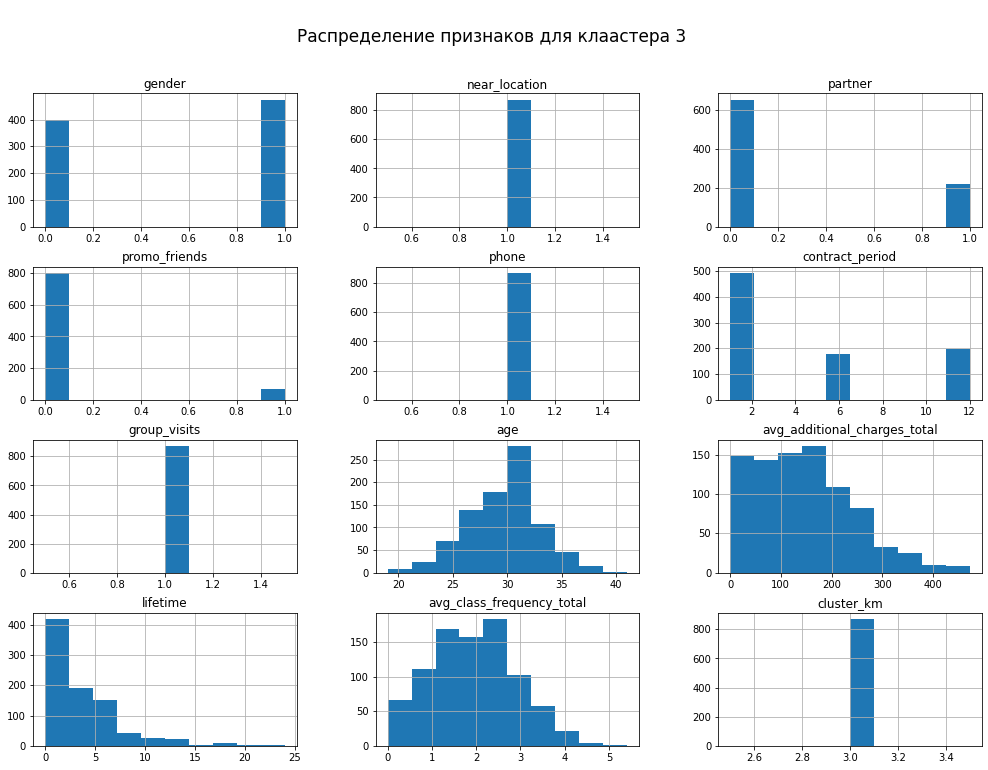

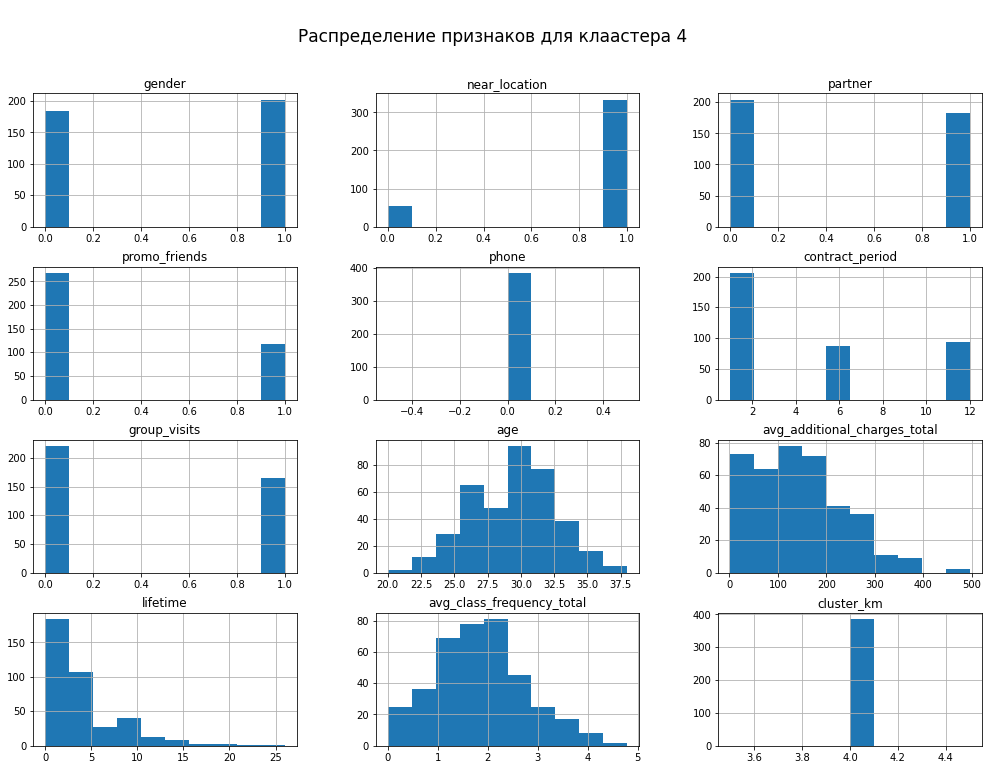

In [38]:
for cluster in range(0,5):
    data_clear_no_churn[data_clear_no_churn['cluster_km'] == cluster].hist(figsize=(17,12))
    plt.suptitle('\nРаспределение признаков для клаастера {}'.format(cluster), fontsize = 17)
    plt.show()

<div class="alert alert-info" role="alert">
<h2>Комментарий студента<a class="tocSkip"></h2>
    Перерисуем графики согласно графикам из анализа данных.
    </div>

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


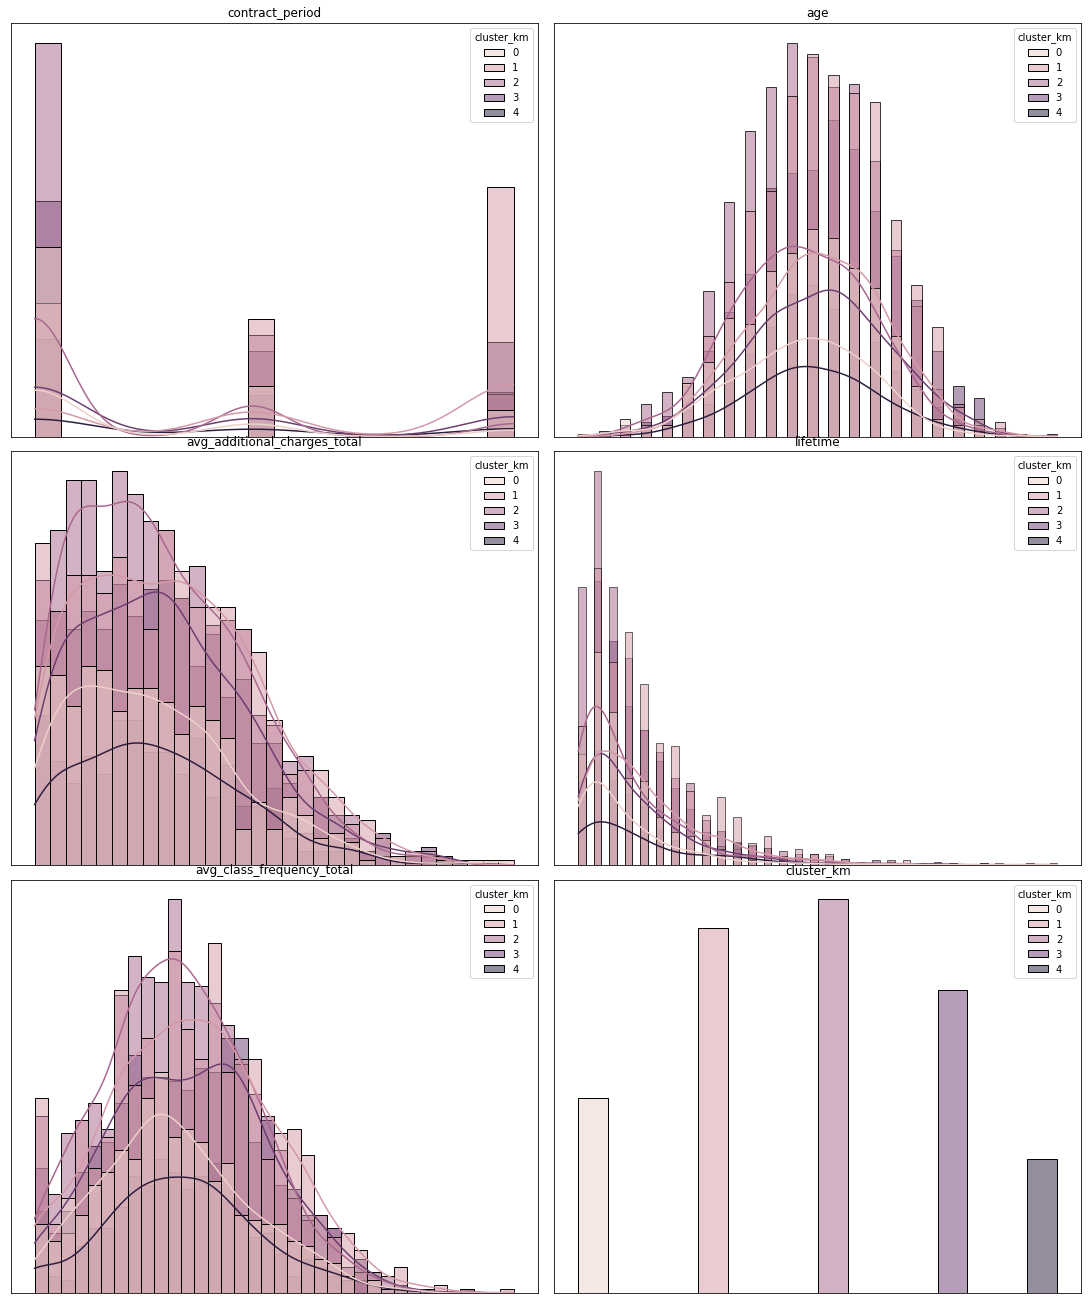

In [39]:
list_columns =  ['contract_period', 'age', 'avg_additional_charges_total', 'lifetime', 
                 'avg_class_frequency_total', 'cluster_km']
fig = plt.figure(constrained_layout=True)
j = 0

plt.gcf().set_size_inches(15, 18)

for column in list_columns:
    j = j + 1
    ax_j = fig.add_subplot(3, 2, j)
    ax_j.set(title = column, xticks=[], yticks=[])
    ax_j = sns.histplot(data_clear_no_churn, x=column, hue='cluster_km',kde=True)

plt.show()

Теперь графики можно прочитать. =)
Первая группа составляет большую часть клиентов у которых контракт остался на 1 месяц.

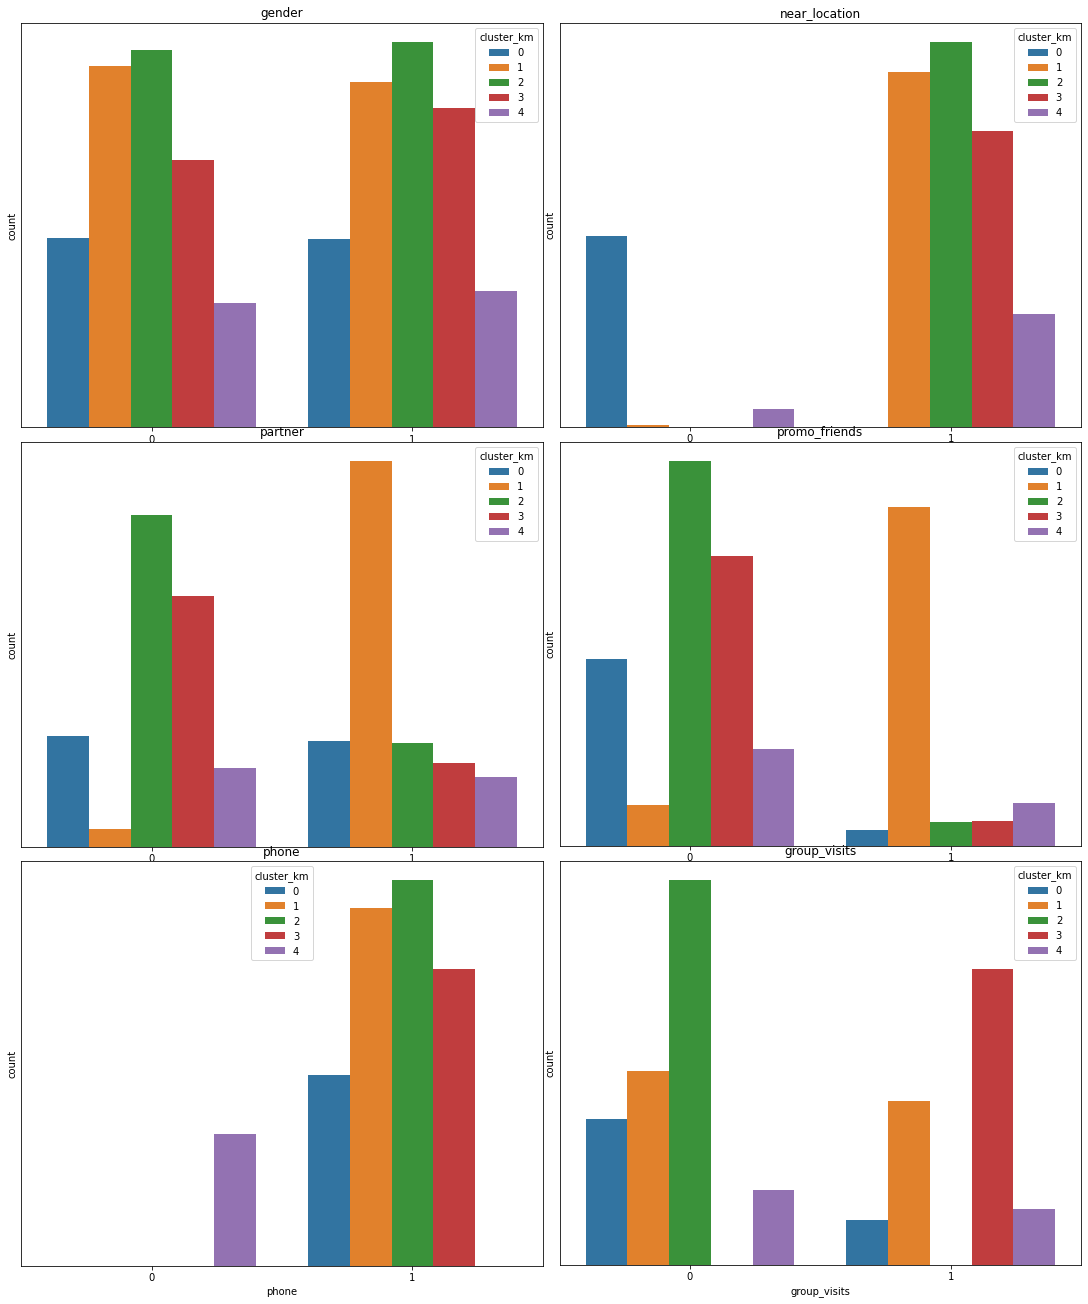

In [40]:
list_columns_negative = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
    
fig = plt.figure(constrained_layout=True)
j = 0

plt.gcf().set_size_inches(15, 18)

for column in list_columns_negative:
    j = j + 1
    ax_j = fig.add_subplot(3, 2, j)
    ax_j.set(title = column, xticks=[], yticks=[])
    ax_j = sns.countplot(data=data_clear_no_churn, hue='cluster_km', x=column)

plt.show()


<div class="alert alert-info" role="alert">
<h2>Комментарий студента<a class="tocSkip"></h2>
    Соотношение мужчин и женщин примерно распределено поровну среди уходящих и остающихся.
    Нулевая группа это те клиенты у которых дорога до зала может занимать продолжительное время.
    Первая группа это клиенты которые пришли по партнерской программе, а вот большая часть группы 2 наоборот.
    Группа 2 это те клиенты которые не воспользовались акцией приведи друга. Большая часть клиентов из группы 1 наоборот воспольщовались этой возможностью.
    Интересное наблюдение, клиенты 4 группы не оставили свой номер в анкете.
    Клиенты 2 группы не посещают групповые занятия. А вот клиенты 3 группы наоборот.
    </div>

<a id="cluster_4_5"></a>
## 4.5 Для каждого полученного кластера посчитаем долю оттока.

In [41]:
data_clear_no_churn['churn'] = data_clear['churn']
data_ML = data_clear_no_churn
data_ML.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


Добавим веротность оттока к признакам кластеров для большей наглядности:
1. <b>Кластер 0</b>
    * <b>вероятность оттока 39,9%</b>
    * клиенты для которых фитнес-зал не находится в ближайшей доступности;
    * большая часть клиентов не являются участниками программы промо-акции;
    * большая часть клиентов имеет контракт на 1 месяц;
    * большая часть клиентов не посещают групповае занятия;
2. <b>Кластер 1</b>
    * <b>вероятность оттока 12.0%</b>
    * клиенты для которых фитнес-зал находится в ближайшей доступности;
    * клиенты являются участниками программы партнерства фитнес-зала с работадетелем клиента;
    * большая часть клиентов не являются участниками программы промо-акции;
    * большая часть клиентов имеет контракт на 12 месяцев;
3. <b>Кластер 2</b>
    * <b>вероятность оттока 26.7%</b>
    * клиенты для которых фитнес-зал находится в ближайшей доступности;
    * большая часть клиентов не являются участниками программы промо-акции;
    * большая часть клиентов имеет контракт на 1 месяц;
4. <b>Кластер 3</b>
    * <b>вероятность оттока 38.2%</b>
    * клиенты для которых фитнес-зал находится в ближайшей доступности;
    * клиенты являются участниками программы партнерства фитнес-зала с работадетелем клиента;
    * большая часть клиентов не являются участниками программы промо-акции;
    * большая часть клиентов имеет контракт на 1 месяц;
    * большая часть клиентов не посещают групповае занятия;
5. <b>Кластер 4</b>
    * <b>вероятность оттока 20.0%</b>
    * клиенты для которых фитнес-зал находится в ближайшей доступности;
    * клиенты являются участниками программы партнерства фитнес-зала с работадетелем клиента;
    * большая часть клиентов не являются участниками программы промо-акции;
    * большая часть клиентов имеет контракт на 1 месяц;
    * большая часть клиентов посещают групповае занятия.

Две группы имеют наибольшие вероятности оттока, это группа "0" и "3".
Пречислим их характерные признаки:
- группа "0"
    * клиенты для которых фитнес-зал не находится в ближайшей доступности;
    * большая часть клиентов не являются участниками программы промо-акции;
    * большая часть клиентов имеет контракт на 1 месяц;
    * большая часть клиентов не посещают групповае занятия;

- группа "3"
    * клиенты для которых фитнес-зал находится в ближайшей доступности;
    * клиенты являются участниками программы партнерства фитнес-зала с работадетелем клиента;
    * большая часть клиентов не являются участниками программы промо-акции;
    * большая часть клиентов имеет контракт на 1 месяц;
    * большая часть клиентов не посещают групповае занятия;

- Выделим общие признаки:
    * большая часть клиентов не являются участниками программы промо-акции; (Это может говорить о том, что у этих клиентов нет занакомых в зале. Отсюда можно предположить, что это влияет на вовлеченность в процесс.) 
    * большая часть клиентов имеет контракт на 1 месяц; (логично что к оттоку склонны клиенты с наименьшим срока контракта.)
    * большая часть клиентов не посещают групповае занятия. (может стоит поработать над расширением спектра предостаавляемых услуг для групповых занятий?)

<a id="summary"></a>
## 5 Выводы.

В ходе данной работы мы выполнили следующие шаги:
### 1. провели исследовательский анализ данных;
        1.1 краткие результаты этого анализа:
        - в зал больше ходит мужчин;
        - для большинства пользователей зал находится рядом с работой или домом - 85%;
        - меньше половины пользователей являются сотрудниками компании партнера фиитнес-клуба;
        - менее трети пользователей пришли по промо-акции;
        - 4,6 месяца - средний период действия абонемента всех пользователей на данный момент;
        - групповые занятия посещают 41% пользователей;
        - средний возраст пользователя - 29 лет;
        - суммарная выручка от других услуг фитнес-центра составляет 146 едениц;
        - в среднем до завершения контракта 4,3 месяца;
        - средний лайфтайм пользователя составляет - 3,7 месяца
        - средняя частота посещений в неделю за все время с начала действия абонемента - 1,88;
        - средняя частота посещений в неделю за предыдущий месяц - 1,77;
        - отток за рассматриваемый период составил - 26,5%.


### 2. построили столбчатые гистограммы распределения признаков для тех, кто ушёл (отток) и тех, кто остался, построили матрицу корреляций;
        2.1 краткие результаты этого шага исследования:
        - есть умеренная корреляция "partner" и "promo_friends". Здесь можно предположить, что работников компаний заманивали промо-акциями;
        - наблюдается умеренная корреляция меежду "partner" и "contract_period". Это может говорить о том,что пользователи которые пришли от компании партнера предпочитают брать абонимент на больший срок;
        - наблюдается умеренная корреляция меежду "partner" и "month_to_end_contract". Это может говорить о том,что пользователи которые пришли от компании партнера предпочитают брать абонимент на больший срок;
        - наблюдается умеренная обратная корреляция меежду "contract_period" и "churn". Это может говорить о том,что чем меньше период контракта, тем больше вероятность оттока данного пользователя. Т.е. люди не имеют большой мотивации продлевать конракт, это заставляет задуматься о качестве сервиса;
        - наблюдается умеренная обратная корреляция меежду "age" и "churn". Т.е. чем меньше пользователь тем больше вероятность оттока;
        - наблюдается умеренная обратная корреляция меежду "month_to_end_contract" и "churn". Это подтверждает выдвинутое ранее предположение о том, что польщователи не продлевают свой абонимент;
        - наблюдается умеренная обратная корреляция меежду "lifetime" и "churn". Чем меньше время с момента первого обращения в фитнес центр тем больше вероятность оттока, т.е. короткие контракты более вероятнее не будут продлины;
        - наблюдается умеренная обратная корреляция меежду "avg_class_frequency_total" и "churn". Т.е. чем меньше человек посещяет, тем больше веротность его оттока. Другими словами, чем меньше заинтересованность, тем более вероятнее клиент уйдет.

### 3. построили модель прогнозирования оттока клиентов двумя методами - логистической регрессией, и случайным лесом;
        3.1 Результаты работы моделей:

        Метрики для модели логистической регрессии:
            Accuracy: 0.90
            Precision: 0.79
            Recall: 0.81
            F1: 0.80
            ROC_AUC: 0.95
        Метрики для модели случайного леса:
            Accuracy: 0.89
            Precision: 0.78
            Recall: 0.77
            F1: 0.78
            ROC_AUC: 0.94
        
        Исходя из полученных коэффициентов мы сделали вывод, что метод логической регресси дает лучшие результаты.


### 4. определили кластеризацию клиентов путем построения дендограммы и обучения модели методом K-means;
        4.1 Программа путем построения дендограммы определила 4 типа клиентов. Но по заданию было указанно принять значение равное 5.
### 5. построили распределения признаков для кластеров и высчитали вероятность оттока для каждой группы.
        5.1 Результаты анализа признаков кластеров:
        Кластер 0
            * вероятность оттока 39,9%;
            * клиенты для которых фитнес-зал не находится в ближайшей доступности;
            * большая часть клиентов не являются участниками программы промо-акции;
            * большая часть клиентов имеет контракт на 1 месяц;
            * большая часть клиентов не посещают групповае занятия;
        Кластер 1
            * вероятность оттока 12.0%;
            * клиенты для которых фитнес-зал находится в ближайшей доступности;
            * клиенты являются участниками программы партнерства фитнес-зала с работадетелем клиента;
            * большая часть клиентов не являются участниками программы промо-акции;
            * большая часть клиентов имеет контракт на 12 месяцев;
        Кластер 2
            * вероятность оттока 26.7%;
            * клиенты для которых фитнес-зал находится в ближайшей доступности;
            * большая часть клиентов не являются участниками программы промо-акции;
            * большая часть клиентов имеет контракт на 1 месяц;
        Кластер 3
            * вероятность оттока 38.2%;
            * клиенты для которых фитнес-зал находится в ближайшей доступности;
            * клиенты являются участниками программы партнерства фитнес-зала с работадетелем клиента;
            * большая часть клиентов не являются участниками программы промо-акции;
            * большая часть клиентов имеет контракт на 1 месяц;
            * большая часть клиентов не посещают групповае занятия;
        Кластер 4
            * вероятность оттока 20.0%;
            * клиенты для которых фитнес-зал находится в ближайшей доступности;
            * клиенты являются участниками программы партнерства фитнес-зала с работадетелем клиента;
            * большая часть клиентов не являются участниками программы промо-акции;
            * большая часть клиентов имеет контракт на 1 месяц;
            * большая часть клиентов посещают групповае занятия.

### Рекомендации для стратегии взаимодействия с клиентами и их удержания.

- На основе общих признаков самых выроятных групп склонных к оттоку сформулируем стратегию удержания клиентов:
    * большая часть клиентов не являются участниками программы промо-акции; (Это может говорить о том, что у этих клиентов нет занакомых в зале. Отсюда можно предположить, что это влияет на вовлеченность в процесс. Возможно стоит провести "день рождения клуба" в формате вечерини. Для того, что бы клиенты могли пообщаться с фитнесс тренерами в неформальной обстановке, да и сами клиенты могли найти себе единомышленников.)
    * большая часть клиентов имеет контракт на 1 месяц; (логично что к оттоку склонны клиенты с наименьшим срока контракта.)
    * большая часть клиентов не посещают групповае занятия. (может стоит поработать над расширением спектра предостаавляемых услуг для групповых занятий)